**Dummy Classifiers e árvores de decisção**

In [1]:
#imorte de bibliotécas
!pip install pandas
import pandas as pd
from datetime import datetime

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://binarios.intranet.bb.com.br/artifactory/api/pypi/pypi/simple, http://atf.intranet.bb.com.br/artifactory/api/pypi/bb-python-local/simple


In [2]:
#carregando o arquivo
dados = pd.read_csv("car-prices.csv")
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
#renomeando as colulas
a_renomear = { 
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
#substituindo os valores da coluna Vendido:
a_trocar = {
    'no': 0,
    'yes': 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [5]:
#calculando a idade do veículo:
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [6]:
#convertendo milhas para kms:
dados ['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,24,35085.22134
1,1,7843,1998,40557.96,1,26,12622.05362
2,2,7109,2006,89627.50,0,18,11440.79806
3,3,26823,2015,95276.14,0,9,43167.32682
4,4,7935,2014,117384.68,1,10,12770.11290


In [7]:
#excluindo colunas desnecessárias:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


In [8]:
#separando o X do Y:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [9]:
#utilizando o modelo LinearSVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 65.24%


**Comparando o resulatado com DummyClassifier**

existe uma melhora do LinearSVC em relação do DummyClassifier. Contudo, a estratégia utilizada pelo DummyClassifier é estratificada ou (stratified), ou seja, proporcional; se temos 30% de itens da classe 0 e 70% da classe 1, o estimador manterá esse padrão em sua classificação.

In [10]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)

acuracia = dummy_stratified.score(teste_x, teste_y) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 52.44%


Testaremos uma outra estratégia do DummyClassifier, o argumento most_frequent, ou "mais frequente":

In [11]:
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 58.00%


**Classificação utilizando modelo SVC**
<br>

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


***Árvore de decisão e visualizando as decisões de um estimador***

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier()
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 73.32%


In [14]:
!pip install graphviz==0.10
from sklearn.tree import export_graphviz
import graphviz

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)




Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://binarios.intranet.bb.com.br/artifactory/api/pypi/pypi/simple, http://atf.intranet.bb.com.br/artifactory/api/pypi/bb-python-local/simple
A acurácia foi 79.28%


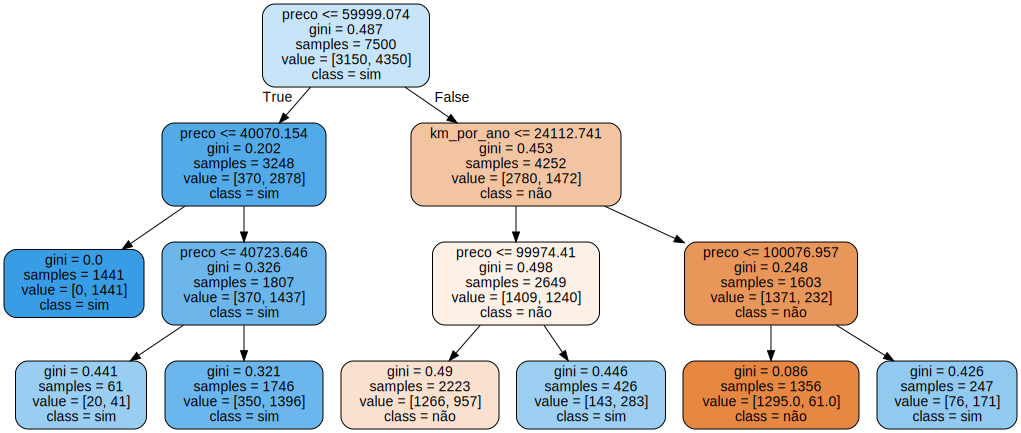

In [15]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico